In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Bio import  Entrez, Medline, SeqIO
from Bio import SeqIO
from plotnine import *
import pandas as pd

In [7]:
isoleucine_codons = ['ATA', 'ATC', 'ATT']
def codon_frequency(sequence, codons):
    frequency = {}
    codon = str()
    for nucleotide in sequence:
        codon += nucleotide
        
        if len(codon) % 3 == 0:
            if codon in isoleucine_codons:
                try:
                    frequency[codon] += 1
                except:
                    frequency[codon] = 0
                codon = str()
            else:
                codon = str()
    return frequency

In [8]:
file_name = ['LSM6.fasta', 'MAPK1IP1L.fasta', 'MICU1.fasta', 'MOCS2.fasta', 'PYCARD.fasta', 'SMDC.fasta']
growth_promotors = {}
for name in file_name:
    parsed_data = SeqIO.read(name, 'fasta')
    parsed_seq = parsed_data.seq
    frequency_cal = codon_frequency(parsed_seq, isoleucine_codons)
    growth_promotors[str(name)] = frequency_cal
print(growth_promotors)

    

{'LSM6.fasta': {'ATT': 21, 'ATC': 6, 'ATA': 16}, 'MAPK1IP1L.fasta': {'ATA': 39, 'ATC': 30, 'ATT': 55}, 'MICU1.fasta': {'ATA': 10, 'ATC': 5, 'ATT': 7}, 'MOCS2.fasta': {'ATT': 38, 'ATC': 19, 'ATA': 35}, 'PYCARD.fasta': {'ATC': 2, 'ATA': 0}, 'SMDC.fasta': {'ATT': 43, 'ATA': 20, 'ATC': 11}}


/var/folders/pq/qfw7ttdx6js3zt8l7f7hpvtm0000gn/T/ipykernel_14215/751795382.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
/opt/anaconda3/lib/python3.9/site-packages/plotnine/facets/facet.py:446: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'
/opt/anaconda3/lib/python3.9/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_bar : Removed 1 rows containing missing values.


        fasta codon  count
0        LSM6   ATT   21.0
1   MAPK1IP1L   ATT   55.0
2       MICU1   ATT    7.0
3       MOCS2   ATT   38.0
4      PYCARD   ATT    NaN
5        SMDC   ATT   43.0
6        LSM6   ATC    6.0
7   MAPK1IP1L   ATC   30.0
8       MICU1   ATC    5.0
9       MOCS2   ATC   19.0
10     PYCARD   ATC    2.0
11       SMDC   ATC   11.0
12       LSM6   ATA   16.0
13  MAPK1IP1L   ATA   39.0
14      MICU1   ATA   10.0
15      MOCS2   ATA   35.0
16     PYCARD   ATA    0.0
17       SMDC   ATA   20.0


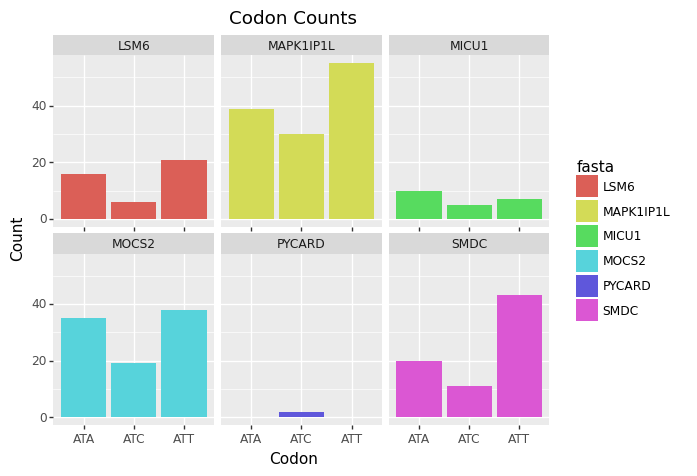

<ggplot: (361340227)>

In [14]:
# Data Visualizations

df = pd.DataFrame(growth_promotors).T.reset_index().rename(columns={'index':'fasta'})
df['fasta'] = df['fasta'].str.replace('.fasta', '')
df = pd.melt(df, id_vars='fasta', var_name='codon', value_name='count')
print(df)
(ggplot(df, aes(x='codon', y='count', fill='fasta'))
 + geom_bar(stat='identity', position='dodge')
 + labs(x='Codon', y='Count', title='Codon Counts')
 + facet_wrap('fasta', scales='free_x')
)

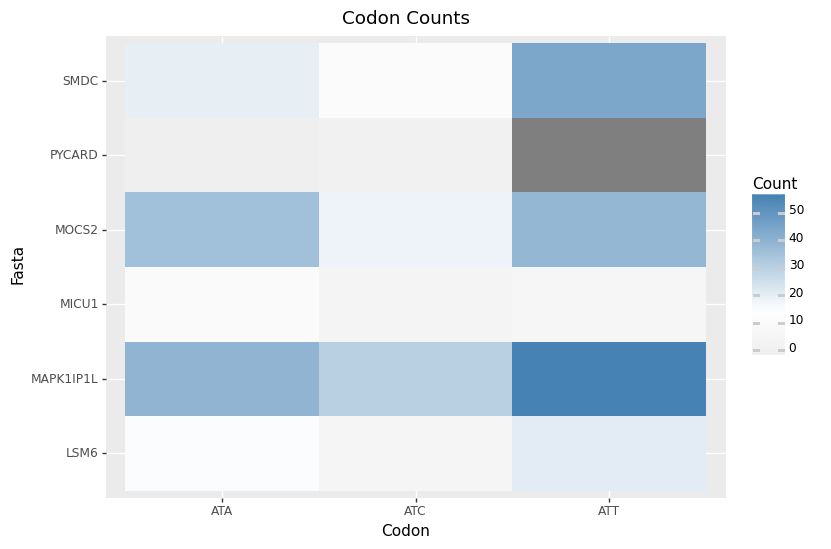

<ggplot: (362147253)>

In [23]:
# create a heatmap for each codon of fasta
(ggplot(df, aes(x='codon', y='fasta', fill='count'))
 + geom_tile()
 + labs(x='Codon', y='Fasta', title='Codon Counts')
 + scale_fill_gradient2(low='#D3D3D3', mid='#FFFFFF', high='#4682B4', midpoint=15) # change color scheme
 + guides(fill=guide_colorbar(title='Count')) # add color legend
 + theme(figure_size=(8, 6)) # increase the figure size
)